<a href="https://colab.research.google.com/github/vacuum1/MonProjet/blob/master/TrainSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd '/content/drive/My Drive/Recherche/MonProjet/'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
PATH = "/content/drive/My Drive/Recherche/MonProjet/images/image"
train_dir = os.path.join(PATH, 'train') #Chemin vers les données d'entrainements
validation_dir = os.path.join(PATH, 'validation')#Chemin vers les données de validation

In [ ]:
train_comptonie_dir = os.path.join(train_dir, 'comptonie')
train_kalmia_dir = os.path.join(train_dir, 'kalmia')
train_qutretemps_dir = os.path.join(train_dir, 'quatretemps')
train_tussock_dir = os.path.join(train_dir, 'tussock')
validation_comptonie_dir = os.path.join(validation_dir, 'comptonie')
validation_kalmia_dir = os.path.join(validation_dir, 'kalmia')
validation_qutretemps_dir = os.path.join(validation_dir, 'quatretemps')
validation_tussock_dir = os.path.join(validation_dir, 'tussock')

In [ ]:
num_comptonie_tr = len(os.listdir(train_comptonie_dir))
num_kalmia_tr = len(os.listdir(train_kalmia_dir))
num_qutretemps_tr = len(os.listdir(train_qutretemps_dir))
num_tussock_tr = len(os.listdir(train_tussock_dir))

num_comptonie_val = len(os.listdir(validation_comptonie_dir))
num_kalmia_val= len(os.listdir(validation_kalmia_dir))
num_qutretemps_val = len(os.listdir(validation_qutretemps_dir))
num_tussock_val = len(os.listdir(validation_tussock_dir))

total_train = num_comptonie_tr + num_kalmia_tr +  num_tussock_tr
total_val = num_comptonie_val + num_kalmia_val + num_tussock_val


In [ ]:
print('total training comptonie images:', num_comptonie_tr)
print('total training kalmia images:', num_kalmia_tr)
print('total training qutretemps images:', num_qutretemps_tr)
print('total training tussock images:', num_tussock_tr)

print('total validation comptonie images:', num_comptonie_val)
print('total validation kalmia images:', num_kalmia_val)
print('total validation qutretemps images:', num_qutretemps_val)
print('total validation tussock images:', num_tussock_val)
print("------")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training comptonie images: 900
total training kalmia images: 898
total training qutretemps images: 900
total training tussock images: 899
total validation comptonie images: 299
total validation kalmia images: 302
total validation qutretemps images: 300
total validation tussock images: 300
------
Total training images: 2697
Total validation images: 901


In [ ]:
# assignement des variables pour le prétraitement
batch_size = 64
epochs = 50
IMG_HEIGHT = 180
IMG_WIDTH = 320

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1.0/255.0,) #horizontal_flip=True, vertical_flip=True, rotation_range=90)#prétraitement des données d'entrainement
validation_image_generator = ImageDataGenerator(rescale=1.0/255.0,) #prétraitement des données de validation

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           #color_mode="grayscale",
                                                           class_mode='categorical',
                                                           shuffle=True)

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           #color_mode="grayscale",
                                                           class_mode='categorical',
                                                           shuffle=False)

Found 3597 images belonging to 4 classes.
Found 1201 images belonging to 4 classes.


In [ ]:
from livelossplot import PlotLossesKeras

In [ ]:
callbacks_list = [
            # Sauvegarde du modèle
            ModelCheckpoint(
                filepath = 'best_model_3001.h5',
                #filepath = 'best_model{}'.format(time.time()).'h5',
                verbose=1,
                save_best_only=True,
                monitor="val_accuracy",
                #mode='max'
            ),
            PlotLossesKeras(),
            # Arrêt automatique si aucune amélioration
            EarlyStopping(
                patience=20, restore_best_weights=True, verbose=1, monitor="val_accuracy"
            ),
            # Réduction du Learning Rate (LR) si aucune amélioration
            #ReduceLROnPlateau(patience=2, factor=0.6, verbose=1, min_lr=0.00001),
        ]

In [ ]:
model = Sequential([
	Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
	Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
	MaxPooling2D((2, 2)),
	Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
	Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
	MaxPooling2D((2, 2)),
	Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
	Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
	MaxPooling2D((2, 2)),
	Flatten(),
	Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
  Dropout(0.5),
	Dense(4, activation='softmax')
])
"""
model = Sequential([
    Conv2D(32, 3,  activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
    MaxPooling2D(),

    Conv2D(64, 3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),

    Conv2D(128, 3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    
    Conv2D(32, 3,  activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),

    Flatten(),

    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(4, activation="softmax"),
])
"""

'\nmodel = Sequential([\n    Conv2D(32, 3,  activation=\'relu\', input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),\n    MaxPooling2D(),\n\n    Conv2D(64, 3, activation=\'relu\', kernel_regularizer=l2(0.01)),\n    MaxPooling2D(),\n\n    Conv2D(128, 3, activation=\'relu\', kernel_regularizer=l2(0.01)),\n    MaxPooling2D(),\n    \n    Conv2D(32, 3,  activation=\'relu\', kernel_regularizer=l2(0.01)),\n    MaxPooling2D(),\n\n    Flatten(),\n\n    Dense(512, activation=\'relu\', kernel_regularizer=l2(0.01)),\n    Dropout(0.5),\n    Dense(4, activation="softmax"),\n])\n'

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#compile model
#opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
#model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 320, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 320, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 160, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 160, 64)       18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 160, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 80, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 80, 128)       7

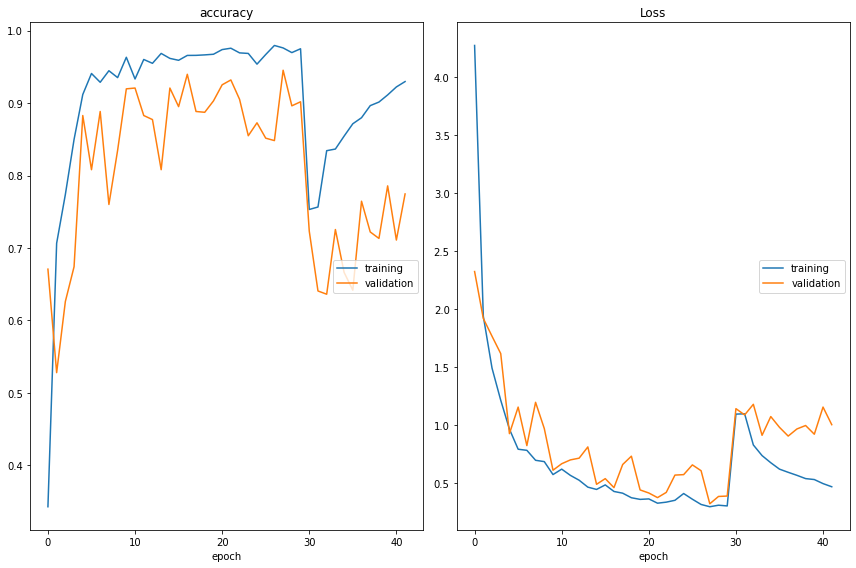

accuracy
	training         	 (min:    0.343, max:    0.980, cur:    0.930)
	validation       	 (min:    0.528, max:    0.945, cur:    0.775)
Loss
	training         	 (min:    0.298, max:    4.270, cur:    0.470)
	validation       	 (min:    0.323, max:    2.323, cur:    1.004)
Epoch 43/50
35/42 [========================>.....] - ETA: 2:30 - loss: 0.4848 - accuracy: 0.9335

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

In [ ]:
model = load_model("best_model_3001.h5")

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Y_pred = model.predict_generator(val_data_gen, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

NameError: ignored

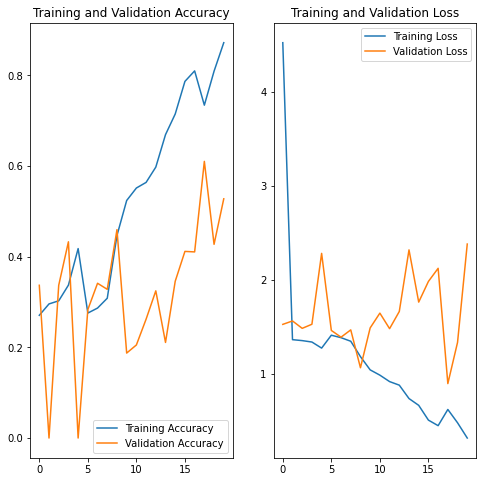

In [ ]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import json
import operator
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

In [ ]:
def get_classes(classes_path="classes.json"):
    """
    Lis l'ordre des classes à partir d'un fichier JSON.

    Parameters
    ----------
    classes_path : str = "classes.json"
        Chemin du fichier JSON.

    Returns
    -------
    classes : List[str]
        Liste ordonnée des classes.
    """

    with open(classes_path, "r") as f:
        classes = json.load(f)

    classes = [k for (k, v) in sorted(classes.items(), key=operator.itemgetter(1))]

    return classes

In [ ]:
def classer_plant_bleuet(img, model, classes):
    """
    À partir d'un modèle et d'une image RGB (ndarray de taille 180x320x3), retourne la classe
    prédite par le modèle (rien, bourgeon, fleur, fruit) et la probabilité associée à la prédiction.

    Parameters
    ----------
    img : numpy.ndarray
        Image RGB avec shape = (195, 195).

    model : keras.models.Sequential
        Modèle à utiliser.

    classes : List[str]
        Liste ordonnée des classes à utiliser.

    Returns
    -------
    (prediction, probability)

    prediction : str
        La classe prédite par le modèle.

    probability : float
        La probabilité qu'il s'agit de cette classe.
    """

    # Convertir (couleur -> gris -> composantes normalisées)
    datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                 #horizontal_flip=True, 
                                 #vertical_flip=True, 
                                 #rotation_range=90
                                 )#prétraitement des données d'entrainement
        #samplewise_center=True,
        #samplewise_std_normalization=True,
        #horizontal_flip=True,
        #vertical_flip=True,
        #rescale=1./255,
    #)
    #img = img.reshape(1, 128, 128, 3)
    input_data = img.reshape((1,) + img.shape)
    input_data = input_data.astype(np.float64)
    input_data = datagen.standardize(input_data)

    # Prédiction
    preds = model.predict(input_data)
    mx = np.argmax(preds, axis=1)[0]

    return classes[mx], preds[0][mx]

In [ ]:
def main():
    """

    Exemple d'utilisation

    """

    # Lire le modèle
    model = load_model("best_model_3001.h5")

    classes = get_classes()

    # Lire des images
    img_paths = [
        "images/tests/test7.jpg",
        "images/tests/test5.jpg",
        "images/tests/test3.jpg",
        #"images/tests/test2 (4).jpg",
        #"images/tests/test2 (5).jpg",
        #"images/tests/test-002.jpg",
        #"images/tests/test-003.jpg",
        #"images/tests/test-004.jpg",
    ]

    imgs = map(cv2.imread, img_paths)
    #imgs = map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), imgs)

    for img in imgs:
        if img is not None:
            pred, prob = classer_plant_bleuet(img, model, classes)
            print(f"{pred} ({round(prob * 100, 3)} %)")
        else:
            print("Impossible de lire l'image")

In [ ]:
if __name__ == "__main__":
    main()

quatretemps (99.999 %)
quatretemps (99.989 %)
quatretemps (99.999 %)
